# Robinhood CodeSignal Question #1

In [1]:
# import relevent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

# Modelling
# from sklearn.model_selection import train_test_split
from sklearn import linear_model 

import warnings
warnings.filterwarnings('ignore')

np.random.seed(1)
%matplotlib inline

In [2]:
# Read in the data
df_1 = pd.read_csv("delta_price_symbols_A_to_D.csv")
df_2 = pd.read_csv("delta_price_symbols_E_to_H.csv")
df_3 = pd.read_csv("delta_price_symbol_X.csv")

In [3]:
df_1.head()

,Unnamed: 0,Date,delta_price_A,delta_price_B,delta_price_C,delta_price_D
0,0,2018-06-04,0.007782,0.004563,0.007087,0.004751
1,1,2018-06-05,0.001894,0.001235,-0.000292,0.000728
2,2,2018-06-06,0.002690,0.007222,0.003319,0.008361
3,3,2018-06-07,0.007832,0.002739,0.004544,-0.000108
4,4,2018-06-08,-0.003958,-0.000108,0.001158,0.002956


In [4]:
df_2.head()

,Unnamed: 0,Date,delta_price_E,delta_price_F,delta_price_G,delta_price_H
0,0,2018-06-04,0.013106,0.008679,0.012875,0.009031
1,1,2018-06-05,0.008951,0.004531,0.005778,0.003098
2,2,2018-06-06,0.001774,0.004340,0.000402,0.005834
3,3,2018-06-07,0.004971,0.000227,-0.003388,-0.008132
4,4,2018-06-08,-0.012963,-0.005968,-0.002132,0.000057


In [5]:
df_3.head()

,Unnamed: 0,Date,delta_price_X
0,0,2018-06-04,0.163004
1,1,2018-06-05,-0.123008
2,2,2018-06-06,0.044443
3,3,2018-06-07,0.008938
4,4,2018-06-08,-0.145517


In [6]:
# Lets merge our data files first
# We can use date as the key as it is distinct  
print(len(df_1))
df_1["Date"].nunique()

125


125

In [7]:
# Merge dataframes into one
df_4 = df_1.merge(df_2, how ="inner", on="Date")
data = df_4.merge(df_3, how ="inner", on="Date")
data.head(2)

,Unnamed: 0_x,Date,delta_price_A,delta_price_B,delta_price_C,delta_price_D,Unnamed: 0_y,delta_price_E,delta_price_F,delta_price_G,delta_price_H,Unnamed: 0,delta_price_X
0,0,2018-06-04,0.007782,0.004563,0.007087,0.004751,0,0.013106,0.008679,0.012875,0.009031,0,0.163004
1,1,2018-06-05,0.001894,0.001235,-0.000292,0.000728,1,0.008951,0.004531,0.005778,0.003098,1,-0.123008


In [8]:
data = data.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], axis=1)
data.head()

,Date,delta_price_A,delta_price_B,delta_price_C,delta_price_D,delta_price_E,delta_price_F,delta_price_G,delta_price_H,delta_price_X
0,2018-06-04,0.007782,0.004563,0.007087,0.004751,0.013106,0.008679,0.012875,0.009031,0.163004
1,2018-06-05,0.001894,0.001235,-0.000292,0.000728,0.008951,0.004531,0.005778,0.003098,-0.123008
2,2018-06-06,0.002690,0.007222,0.003319,0.008361,0.001774,0.004340,0.000402,0.005834,0.044443
3,2018-06-07,0.007832,0.002739,0.004544,-0.000108,0.004971,0.000227,-0.003388,-0.008132,0.008938
4,2018-06-08,-0.003958,-0.000108,0.001158,0.002956,-0.012963,-0.005968,-0.002132,0.000057,-0.145517


## Descriptive Statistics

In [9]:
# dealing with missing values
data.isnull()
# Sum up the number of rows with missing values
data.isnull().any(axis = 1).sum() 

0

In [10]:
data.describe()

,delta_price_A,delta_price_B,delta_price_C,delta_price_D,delta_price_E,delta_price_F,delta_price_G,delta_price_H,delta_price_X
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,-0.000048,0.000039,-0.000085,0.000065,-0.000213,-0.000150,-0.000284,-0.000103,0.006447
std,0.008397,0.006478,0.008175,0.008569,0.013098,0.009457,0.011857,0.013151,0.148899
min,-0.033992,-0.027918,-0.031000,-0.031663,-0.049970,-0.033074,-0.040559,-0.045767,-0.285468
25%,-0.004013,-0.002980,-0.003345,-0.003771,-0.007878,-0.004657,-0.006644,-0.005468,-0.096581
50%,0.000315,0.000210,0.000618,0.000242,0.001567,-0.000405,0.001160,0.000734,-0.017497
75%,0.004636,0.003455,0.005397,0.004285,0.007797,0.004340,0.007281,0.006700,0.093948
max,0.026472,0.023025,0.026604,0.023025,0.036068,0.031378,0.040306,0.034595,0.762340


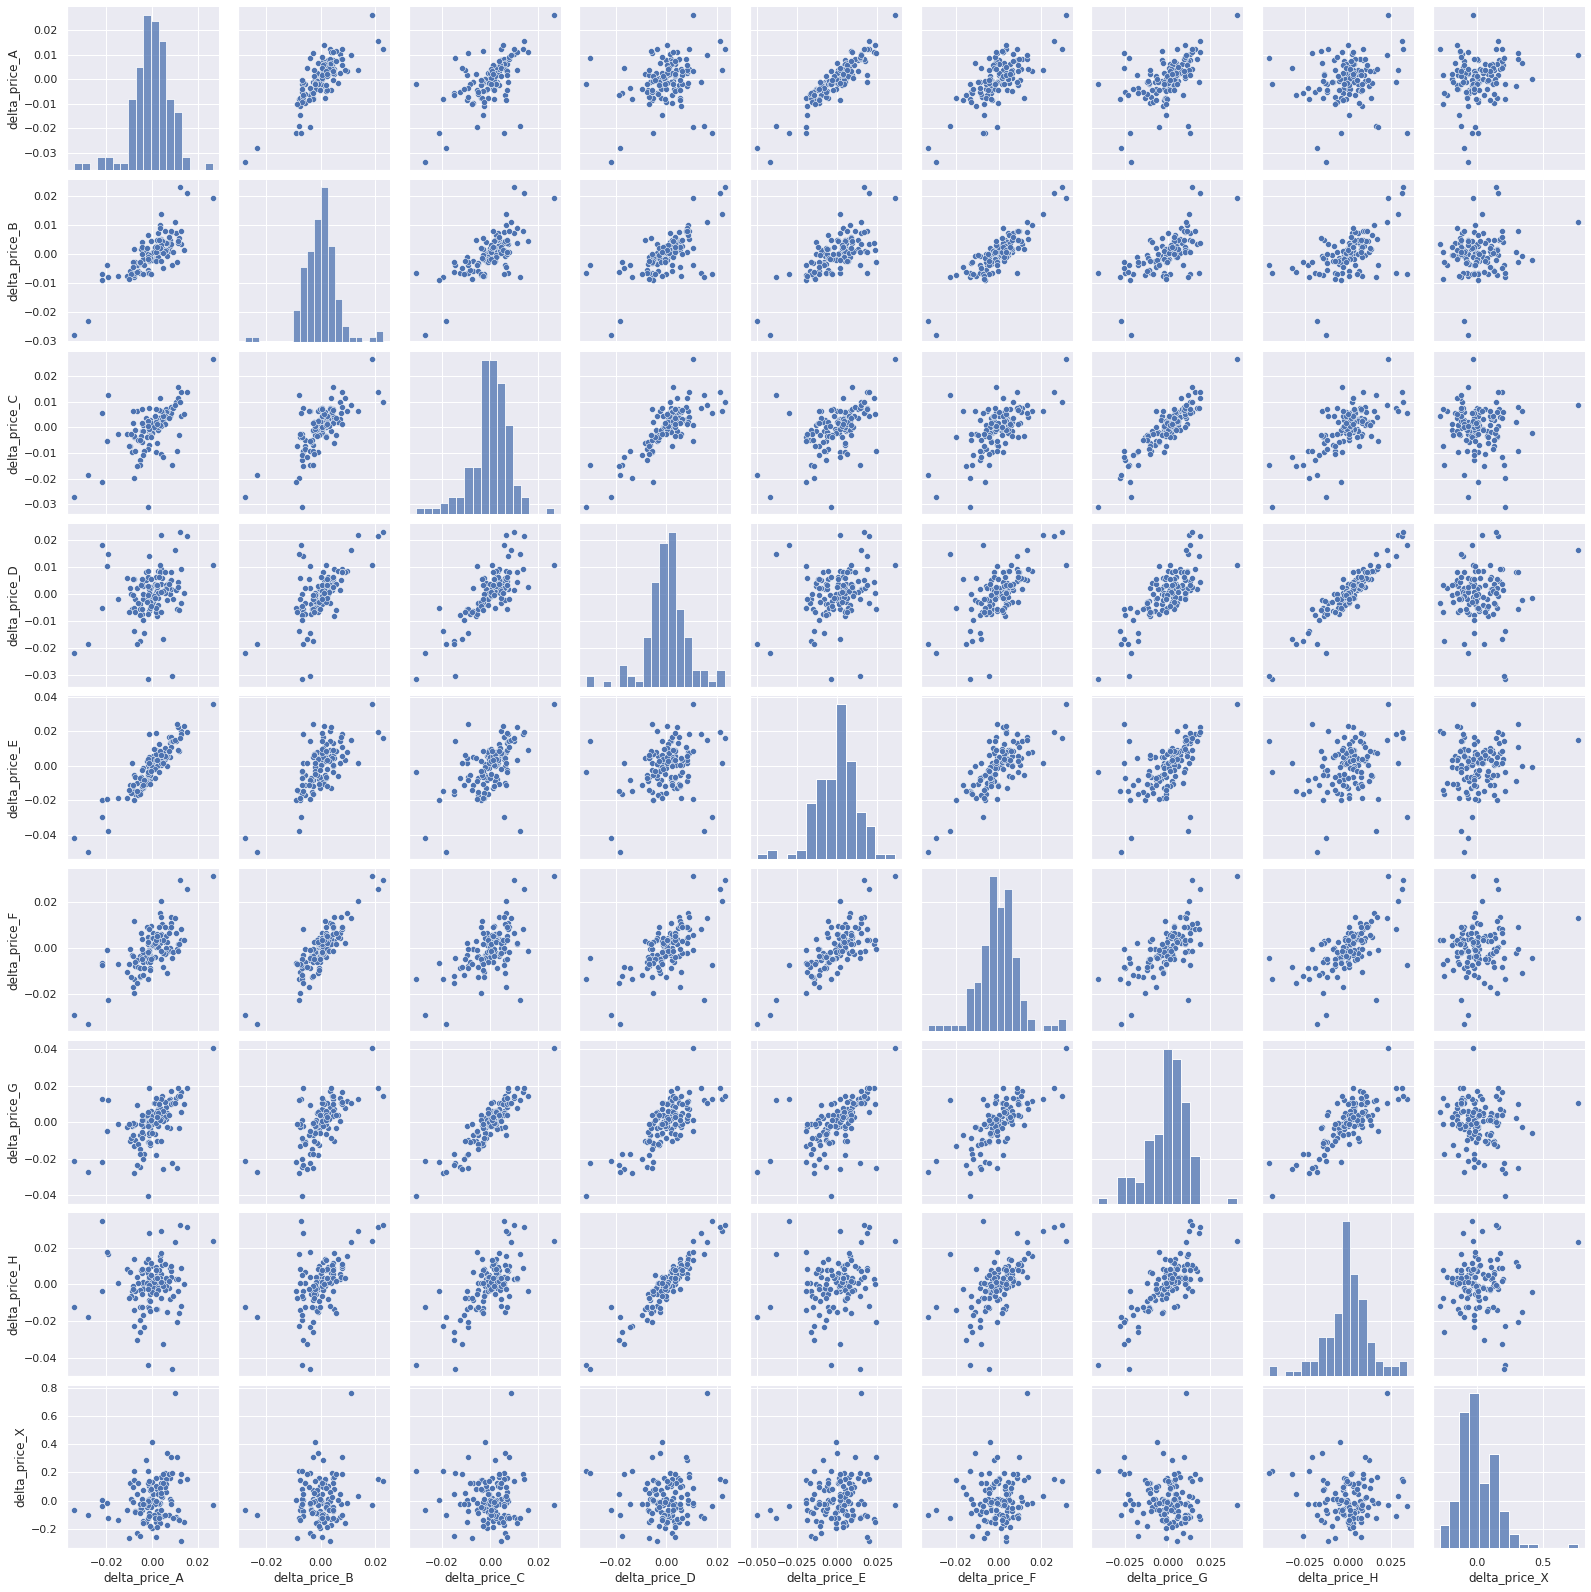

In [11]:
# An easy and convienient way to look at the distribution of each variable, 
# And their relationship with other variables is with pairplot. 
sns.pairplot(data)


##### Wow! The above plot shows us ALOT.
- For example, we can see most of our variables are most likely normally distributed (With some skewness), 
- As for the variables relationship with the response (The last column, delta_price_X), we can see we have some linear relationships but not a strong co-relation with the response for the most part. 
- Furthermore, it looks like some of these variables have a strong positive linear relationship amongst themselves.
- Lets dive a bit deeper into that. 

In [12]:
data.corr() # SO it looks like a MLR model may not be our best choice here, as there is barely any positive relations.
# Its important to note the correlation only checks linear relationship, and not non-linear.
# Also, we might have outliers in our data we need to check for / clean up. 
# Also, as for the highly co-related variables, we would have to check for confounding variables, fix multi-colinearity, etc.

,delta_price_A,delta_price_B,delta_price_C,delta_price_D,delta_price_E,delta_price_F,delta_price_G,delta_price_H,delta_price_X
delta_price_A,1.000000,0.791721,0.586394,0.271524,0.913047,0.693663,0.502499,0.131774,0.182841
delta_price_B,0.791721,1.000000,0.709713,0.640808,0.699646,0.877615,0.654956,0.520957,0.143133
delta_price_C,0.586394,0.709713,1.000000,0.786771,0.526492,0.606091,0.901712,0.679629,-0.031971
delta_price_D,0.271524,0.640808,0.786771,1.000000,0.272347,0.623473,0.760157,0.932956,0.049000
delta_price_E,0.913047,0.699646,0.526492,0.272347,1.000000,0.745863,0.542534,0.192839,0.142850
delta_price_F,0.693663,0.877615,0.606091,0.623473,0.745863,1.000000,0.697954,0.626105,0.117206
delta_price_G,0.502499,0.654956,0.901712,0.760157,0.542534,0.697954,1.000000,0.777690,-0.132598
delta_price_H,0.131774,0.520957,0.679629,0.932956,0.192839,0.626105,0.777690,1.000000,0.005296
delta_price_X,0.182841,0.143133,-0.031971,0.049000,0.142850,0.117206,-0.132598,0.005296,1.000000


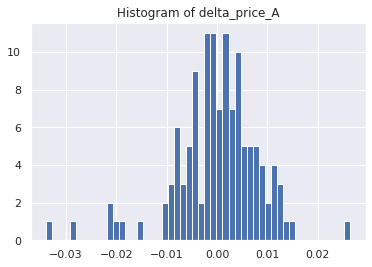

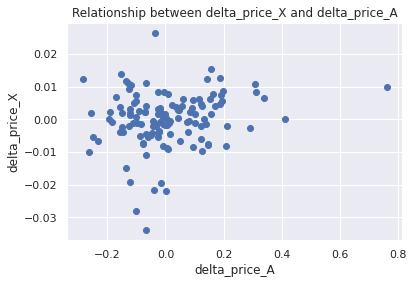

In [13]:
# Plot the histogram for delta_price_A variable
plt.hist(data["delta_price_A"], bins =50)
plt.title("Histogram of delta_price_A")
plt.show()

fig, ax = plt.subplots()
# scatter the delta_price_X against delta_price_A
ax.scatter(data['delta_price_X'], data['delta_price_A'])
# set a title and labels
ax.set_title('Relationship between delta_price_X and delta_price_A')
ax.set_xlabel('delta_price_A')
ax.set_ylabel('delta_price_X')
plt.show()

<AxesSubplot:>

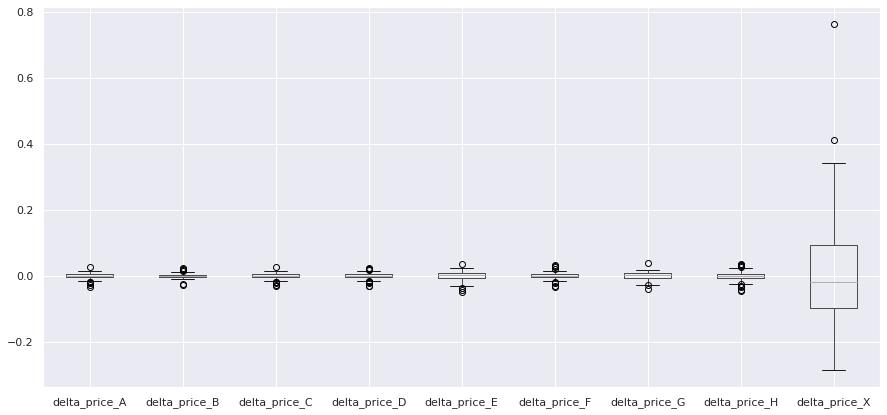

In [14]:
data.boxplot(figsize=(15,7))
# X has some huge outliers. 
# rest of the variables too.

# Modelling and answering the questions  on the test
For the purpose of the assignment, I won't do any of the "fixing" as the coefficients / results will be different for the Multiple Choice questions I have to answer.

In [15]:
data.head()

,Date,delta_price_A,delta_price_B,delta_price_C,delta_price_D,delta_price_E,delta_price_F,delta_price_G,delta_price_H,delta_price_X
0,2018-06-04,0.007782,0.004563,0.007087,0.004751,0.013106,0.008679,0.012875,0.009031,0.163004
1,2018-06-05,0.001894,0.001235,-0.000292,0.000728,0.008951,0.004531,0.005778,0.003098,-0.123008
2,2018-06-06,0.002690,0.007222,0.003319,0.008361,0.001774,0.004340,0.000402,0.005834,0.044443
3,2018-06-07,0.007832,0.002739,0.004544,-0.000108,0.004971,0.000227,-0.003388,-0.008132,0.008938
4,2018-06-08,-0.003958,-0.000108,0.001158,0.002956,-0.012963,-0.005968,-0.002132,0.000057,-0.145517


In [16]:
# Linear Regression for delta price H and Delta Price X (Says Linear, not MLR or regression)

# Define our response and target variables 
X = data[['delta_price_H']] 
Y = data['delta_price_X']
 
# with sklearn 
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 0.00645334843555132
Coefficients: 
 [0.05996208]
